In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [125]:
data = datasets.load_diabetes()
d = data['data']
features = data['feature_names']
d = pd.DataFrame(d)
d.columns = features
d

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


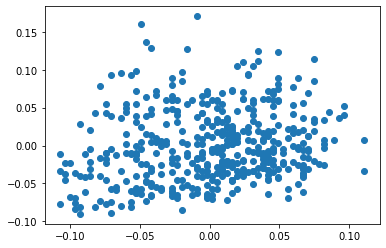

In [126]:
plt.scatter(d['age'], d['bmi'])

In [135]:
def loss_function(m, b, data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i].age
        y = data.iloc[i].bmi
        total_error += (y - (m * x + b)) ** 2
    ans = total_error / float(len(data))
    return ans


In [128]:
def gradient_descent(m_now, b_now, d, L):
    m_gradient = 0
    b_gradient = 0

    n = len(data)

    for i in range(n):
        x = d.iloc[i].age
        y = d.iloc[i].bmi
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

Epoch: 0
Epoch: 500
Epoch: 1000
Epoch: 1500
Epoch: 2000
Epoch: 2500
Epoch: 3000
Epoch: 3500
Epoch: 4000
Epoch: 4500
Epoch: 5000
Epoch: 5500
Epoch: 6000
Epoch: 6500
Epoch: 7000
Epoch: 7500
Epoch: 8000
Epoch: 8500
Epoch: 9000
Epoch: 9500
0.4561850224278696 -0.005054962790847433


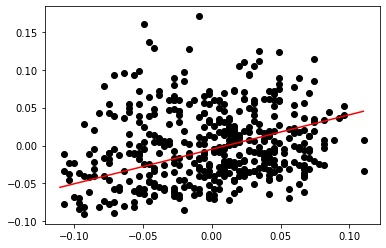

In [140]:
m = 0
b = 0
L = 0.1
epochos = 10000

loss = []

for i in range(epochos):
    if i % 500 == 0:
        print(f'Epoch: {i}')
        loss.append(loss_function(m, b,d))
        
    m, b = gradient_descent(m,b,d, L)

print(m, b)

plt.scatter(d['age'], d['bmi'], color = 'black')
plt.plot(list(np.linspace(-0.11,0.11,300)), [m * x + b for x in list(np.linspace(-0.11,0.11,300))], color = 'red')

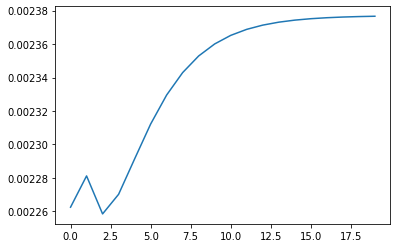

In [146]:
plt.plot(loss)

In [149]:
data = datasets.load_wine()
d = data['data']
features = data['feature_names']
d = pd.DataFrame(d)
d.columns = features

In [150]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [151]:
diabetes_X = pd.DataFrame(diabetes_X)

In [152]:
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [153]:
diabetes_X['1'] = diabetes_y

In [154]:
data = diabetes_X

In [155]:
data

,0,1
0,0.061696,151.0
1,-0.051474,75.0
2,0.044451,141.0
3,-0.011595,206.0
4,-0.036385,135.0
...,...,...
437,0.019662,178.0
438,-0.015906,104.0
439,-0.015906,132.0
440,0.039062,220.0


In [156]:
data.columns = ['a', 'b']
type(data)

pandas.core.frame.DataFrame

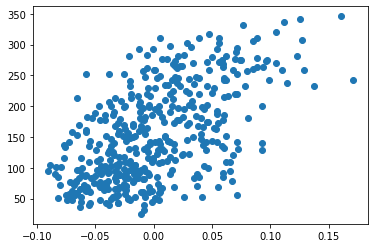

In [157]:
plt.scatter(data.a,data.b)

In [158]:
def loss_function(m, b, data):
    total_error = 0
    for i in range(len(data)):
        x = data.iloc[i].a
        y = data.iloc[i].b
        total_error += (y - (m * x + b)) ** 2
    ans = total_error / float(len(data))
    return ans

In [159]:
def gradient_descent(m_now, b_now, data, L):
    m_gradient = 0
    b_gradient = 0

    n = len(data)

    for i in range(n):
        x = data.iloc[i].a
        y = data.iloc[i].b
        m_gradient += -(2/n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2/n) * (y - (m_now * x + b_now))
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

Epoch: 0
Epoch: 50
Epoch: 100
Epoch: 150
Epoch: 200
Epoch: 250
Epoch: 300
Epoch: 350
Epoch: 400
Epoch: 450
Epoch: 500
Epoch: 550
Epoch: 600
Epoch: 650
Epoch: 700
Epoch: 750
Epoch: 800
Epoch: 850
Epoch: 900
Epoch: 950
Epoch: 1000
Epoch: 1050
Epoch: 1100
Epoch: 1150
Epoch: 1200
Epoch: 1250
Epoch: 1300
Epoch: 1350
Epoch: 1400
Epoch: 1450
Epoch: 1500
Epoch: 1550
Epoch: 1600
Epoch: 1650
Epoch: 1700
Epoch: 1750
Epoch: 1800
Epoch: 1850
Epoch: 1900
Epoch: 1950
Epoch: 2000
Epoch: 2050
Epoch: 2100
Epoch: 2150
Epoch: 2200
Epoch: 2250
Epoch: 2300
Epoch: 2350
Epoch: 2400
Epoch: 2450
Epoch: 2500
Epoch: 2550
Epoch: 2600
Epoch: 2650
Epoch: 2700
Epoch: 2750
Epoch: 2800
Epoch: 2850
Epoch: 2900
Epoch: 2950
886.6509002101511 152.13348416289662


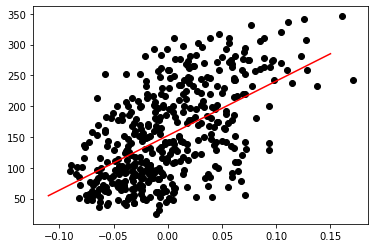

In [160]:
m = 0
b = 0
L = 0.2
epochos = 3000
loss = []

for i in range(epochos):
    if i % 50 == 0:
        print(f'Epoch: {i}')
        loss.append(loss_function(m,b,data))
    m, b = gradient_descent(m,b, data, L)

print(m, b)

plt.scatter(data['a'], data['b'], color = 'black')
plt.plot(list(np.linspace(-0.11,0.15,300)), [m * x + b for x in list(np.linspace(-0.11,0.15,300))], color = 'red')

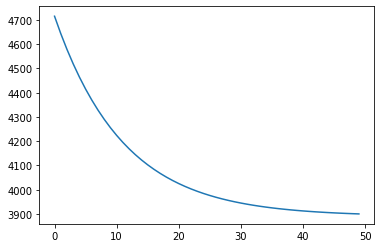

In [176]:
plt.plot(loss[10:])